# Handling Missing Data

In [4]:
import pandas as pd
from io import StringIO
from sklearn.preprocessing import Imputer

In [8]:
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [9]:
df = pd.read_csv(StringIO(csv_data))

Using mean imputation: replace missing value by mean of entire feature column

In [10]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
#could use median or most_frequent for strategy also

In [11]:
imr = imr.fit(df)

In [12]:
imputed_data = imr.transform(df.values)

In [13]:
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

# Categorical Data

In [14]:
df = pd.DataFrame([ ['green', 'M', 10.1, 'class1'], ['red', 'L', 13.5, 'class2'],
                    ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']

In [15]:
#color is nominal feature, size is ordinal, price is numerical 
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [16]:
size_mapping = { 'XL': 3, 'L':2, 'M':1}

In [17]:
df['size'] = df['size'].map(size_mapping)
#this can be undone using reverse mapping dict inv_size_mapping = {v: k for k, v in size_mapping.items()}

In [18]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


### Encoding class labels

In [19]:
import numpy as np

In [20]:
#not ordinal, doesn't matter which number we assign to string label
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}

In [21]:
class_mapping

{'class1': 0, 'class2': 1}

In [22]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [23]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [24]:
#also can use scikit-learn LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [25]:
class_le = LabelEncoder()

In [26]:
class_le.fit_transform(df['classlabel'].values)

array([0, 1, 0])

### One-hot encoding for nominal features

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
X = df[['color','size','price']].values

In [31]:
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])

In [32]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [33]:
ohe = OneHotEncoder(categorical_features=[0])

In [34]:
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [35]:
#even easier using pandas: 

pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


# Partitioning in training and test sets

In [36]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [37]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [38]:
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [39]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
from sklearn.cross_validation import train_test_split

/data/bergeric/miniconda3/envs/s2rnai/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### min-max scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
mms = MinMaxScaler()

In [45]:
X_train_norm = mms.fit_transform(X_train)

In [46]:
X_test_norm = mms.transform(X_test)

### standardization

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
stdsc = StandardScaler()

In [49]:
X_train_std = stdsc.fit_transform(X_train)

In [50]:
X_test_std = stdsc.transform(X_test)

### regularization

In [51]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression(penalty='l1', C=0.1)

In [56]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
print('Training accuracy:', lr.score(X_train_std, y_train))

Training accuracy: 0.983870967742


In [58]:
print('Test accuracy:', lr.score(X_test_std, y_test))

Test accuracy: 0.981481481481


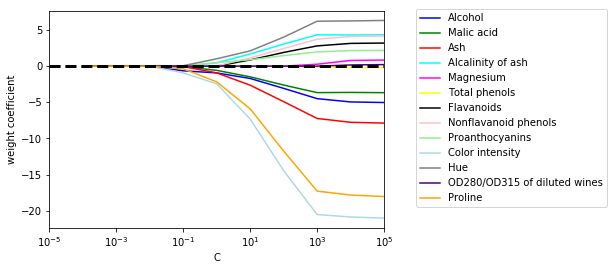

In [61]:
#plot regularization path
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','lightblue','gray','indigo',
         'orange']
weights, params = [], []

for c in np.arange(-4,6, dtype=float):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

## feature selection using Sequential Backward Selection

In [62]:
#not implemented in scikit-learn (yet?)
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score

In [63]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        #splitting is for testing(validation) and training
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, 
                                                            random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=2)

In [66]:
sbs = SBS(knn, k_features=1)

In [67]:
sbs.fit(X_train_std, y_train)

In [68]:
k_feat = [len(k) for k in sbs.subsets_]

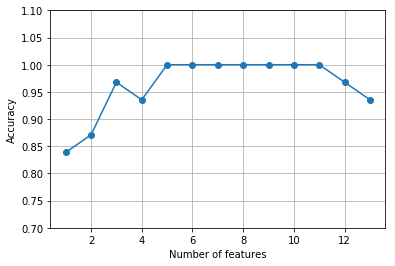

In [69]:
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [70]:
k5 = list(sbs.subsets_[8])

In [71]:
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [72]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [73]:
print('Training accuracy:', knn.score(X_train_std, y_train))

Training accuracy: 0.983870967742


In [74]:
print('Test accuracy:', knn.score(X_test_std, y_test))

Test accuracy: 0.944444444444


In [75]:
#Slight degree of overfitting ^^ 
#Use selected 5 feature subset and see how well KNN performs: 

In [76]:
knn.fit(X_train_std[:, k5], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [77]:
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))

Training accuracy: 0.959677419355


In [78]:
print('Test accuracy: ', knn.score(X_test_std[:, k5], y_test))

Test accuracy:  0.962962962963


### Use random forests to assess feature importance

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
feat_labels = df_wine.columns[1:]

In [81]:
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [82]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [83]:
importances = forest.feature_importances_

In [84]:
indices = np.argsort(importances)[::-1]

In [85]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


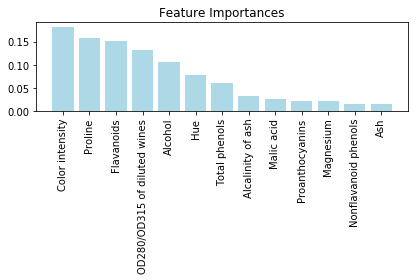

In [87]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [88]:
#Keep in mind with this technique: if 2 or more features highly correlated, one feature may be ranked very highly 
#while information of other features not fully captured